Some typical NumPy 'random' functions:

In [ ]:
import numpy as np

# To generate a random float values between 0 and 1 (exclusive)
print(np.random.rand(3, 2)) # Creates a 3 x 2 matrix of random float values between 0 and 1 (exclusive)

# To generate random float values from standard normal distribution (mean = 0 and std = 1)
print(np.random.randn(5)) # Generates 5 random float values from standard normal distribution

# To generate random integer values within a range of values
print(np.random.randint(1, 100, 10)) # Generates 10 random integer values between 1 and 100 (exclusive)

# To randomly select an element from a given list of elements
print(np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9], size=3)) # Three random numbers from the given array will be chosen

# To generate a random sample of values from a normally distributed with a specified mean and standard deviation
print(np.random.normal(loc=0, scale=1, size=10)) # 10 random values will be generated from a normally distributed data where 0 (loc) is the mean and 1 (scale) is the standard deviation

# To set a seed for a random number generation to ensure you get the same results later as well
print(np.random.seed(42)) # This ensures that any random numbers generated in the program are same every time you run the program. The seed value '42' can be any other value

AIM #1: Generate a very large dataset
1. Generate a dataset of 1 million random data items between 1 and 100 items using only pandas
2. Generate a dataset of 1 million random data items between 1 and 100 using only NumPy
3. Calculate the time it takes for both the above operations. 
    3.1. Import the 'time' module, and use the time() function to calculate current time
    3.2. Which one is faster and why?

In [1]:
# Write your code for AIM #1 here
import pandas as pd
import time

# Start time
start_time_pandas = time.time()

# Generate the dataset
df_pandas = pd.DataFrame({
    'random_data': pd.Series([i for i in range(1, 1000001)])  # 1 million items
}).applymap(lambda x: x % 100 + 1)  # Map each item to a random number between 1 and 100

# End time
end_time_pandas = time.time()

# Calculate time taken
time_taken_pandas = end_time_pandas - start_time_pandas
print(f"Time taken by pandas: {time_taken_pandas} seconds")

Time taken by pandas: 0.5953223705291748 seconds


In [2]:
import numpy as np
import time

# Start time
start_time_numpy = time.time()

# Generate the dataset
np.random.seed(0)  # For reproducibility
np_array = np.random.randint(1, 101, size=1000000)  # 1 million items

# End time
end_time_numpy = time.time()

# Calculate time taken
time_taken_numpy = end_time_numpy - start_time_numpy
print(f"Time taken by NumPy: {time_taken_numpy} seconds")

Time taken by NumPy: 0.013962745666503906 seconds


AIM #2: Basic statistics
For the given dataset on sleep health and lifestyle, do the following
1. Using only pandas, load the dataset, calculate mean 'Sleep Duration', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate' and 'Daily Steps'.
2. Do the same as in Step 1 using only NumPy
3. Using only pandas, first calculate correlation (across only the numerical variables), and then separate correlation between...
    Sleep duration and Age
    Sleep duration and Heart rate
    Sleep duration and Daily steps
4. Using only NumPy, do the same as Step 3
5. Using pandas only, calculate standard deviation for 'Sleep Duration'. 
6. Usiong NumPy only, calculate standard deviation for 'Sleep Duration'. 
7. Calculate the time difference between using pandas and NumPy, right from the step of loading the dataset to the final standard deviation step. 
    5.1. Which one is faster and why?

In [87]:
import pandas as pd
import numpy as np
import time


start_time_pandas_load = time.time()
df = pd.read_csv('sleep_health.csv')
time_pandas_load = time.time() - start_time_pandas_load


start_time_pandas_mean = time.time()
mean_sleep_duration_pd = df['Sleep Duration'].mean()
time_pandas_mean = time.time() - start_time_pandas_mean

start_time_pandas_corr = time.time()
correlation_matrix_pd = df[['Sleep Duration', 'Age', 'Heart Rate', 'Daily Steps']].corr()
time_pandas_corr = time.time() - start_time_pandas_corr


start_time_pandas_std = time.time()
std_sleep_duration_pd = df['Sleep Duration'].std()
time_pandas_std = time.time() - start_time_pandas_std


start_time_numpy_load = time.time()

data = np.genfromtxt('sleep_health.csv', delimiter=',', skip_header=1, dtype=float, encoding='utf-8')
time_numpy_load = time.time() - start_time_numpy_load


start_time_numpy_mean = time.time()
mean_sleep_duration_np = data[:, 4].mean()  # 假设 'Sleep Duration' 是第5列
time_numpy_mean = time.time() - start_time_numpy_mean


data = np.nan_to_num(data, nan=np.nanmean(data, axis=0))


start_time_numpy_corr = time.time()
columns = [4, 1, 10, 11]  
if all(np.any(np.isnan(data[:, i])) for i in columns):
    print("Missing values detected")
    correlation_matrix_np = "Cannot compute correlation due to missing values"
else:
    
    corr_data = data[:, columns].astype(float)
    correlation_matrix_np = np.corrcoef(corr_data.T)  
time_numpy_corr = time.time() - start_time_numpy_corr


start_time_numpy_std = time.time()
std_sleep_duration_np = np.std(data[:, 4])
time_numpy_std = time.time() - start_time_numpy_std


print("Pandas Load Time:", time_pandas_load)
print("Pandas Mean Time:", time_pandas_mean)
print("Pandas Correlation Time:", time_pandas_corr)
print("Pandas Standard Deviation Time:", time_pandas_std)
print("\nNumPy Load Time:", time_numpy_load)
print("NumPy Mean Time:", time_numpy_mean)
print("NumPy Correlation Time:", time_numpy_corr)
print("NumPy Standard Deviation Time:", time_numpy_std)

print("\nPandas Means:", mean_sleep_duration_pd)
print("Pandas Correlation Matrix:", correlation_matrix_pd)
print("Pandas Standard Deviation:", std_sleep_duration_pd)

print("\nNumPy Means:", mean_sleep_duration_np)
print("NumPy Correlation Matrix:\n", correlation_matrix_np)
print("NumPy Standard Deviation:", std_sleep_duration_np)


Pandas Load Time: 0.003991127014160156
Pandas Mean Time: 0.0
Pandas Correlation Time: 0.0009970664978027344
Pandas Standard Deviation Time: 0.0009975433349609375

NumPy Load Time: 0.005983829498291016
NumPy Mean Time: 0.0
NumPy Correlation Time: 0.0009970664978027344
NumPy Standard Deviation Time: 0.0

Pandas Means: 7.132085561497325
Pandas Correlation Matrix:                 Sleep Duration       Age  Heart Rate  Daily Steps
Sleep Duration        1.000000  0.344709   -0.516455    -0.039533
Age                   0.344709  1.000000   -0.225606     0.057973
Heart Rate           -0.516455 -0.225606    1.000000    -0.030309
Daily Steps          -0.039533  0.057973   -0.030309     1.000000
Pandas Standard Deviation: 0.7956567308898189

NumPy Means: 7.132085561497325
NumPy Correlation Matrix:
 [[ 1.                 nan -0.16656987 -0.51645489]
 [        nan         nan         nan         nan]
 [-0.16656987         nan  1.          0.27109222]
 [-0.51645489         nan  0.27109222  1.        

C:\Users\顶峰一只龙\AppData\Local\Temp\ipykernel_10952\1510771275.py:37: RuntimeWarning: Mean of empty slice
  data = np.nan_to_num(data, nan=np.nanmean(data, axis=0))


AIM #3: Use suitable plots to visualize the data

1. Using only pandas (and matplotlib/seaborn if necessary) plot the distribution for
    1.1. Age
    1.2. Sleep Duration
    1.3. Quality of Sleep
    1.4. Physical Activity Level
    1.5. Stress Level
    1.6. Heart Rate
2. Using only NumPy, do the same as Step 1. You will need matplotlib for this
3. Using only pandas, use the appropriate plot to
    3.1. See the distribution of 'Sleep Duration' based on 'Quality of Sleep'
    3.2. See the distribution of 'Sleep Duration' based on 'Stress Level'
    3.3. See the distribution of 'Sleep Duration' based on 'Physical Activity Level'
    3.4. See the distribution of 'Sleep Duration' based on 'Occupation'
    3.5. See the distribution of 'Sleep Duration' based on 'BMI'
4. Using only NumPy, do the same as Step 3. You will need matplotlib for this
5. Using only pandas, use a suitable plot to see the relation between
    5.1. Age and Sleep Duration
    5.2. Sleep Duration and Heart Rate
    5.3. Heart Rate and Daily Steps
    5.4. Sleep Duration and Daily Steps
6. Using only NumPy, do the same as Step 5. You will need matplotlib for this 
7. Find the time difference between plotting using only pandas, and plotting using NumPy

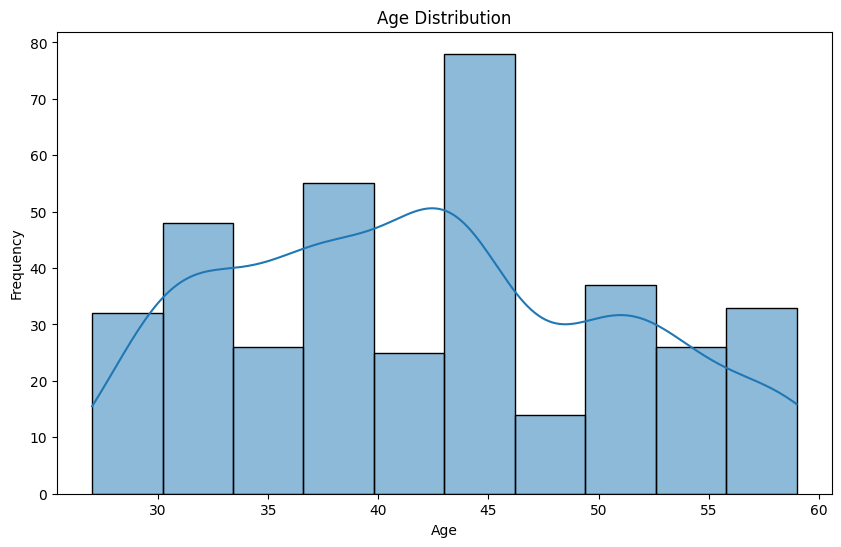

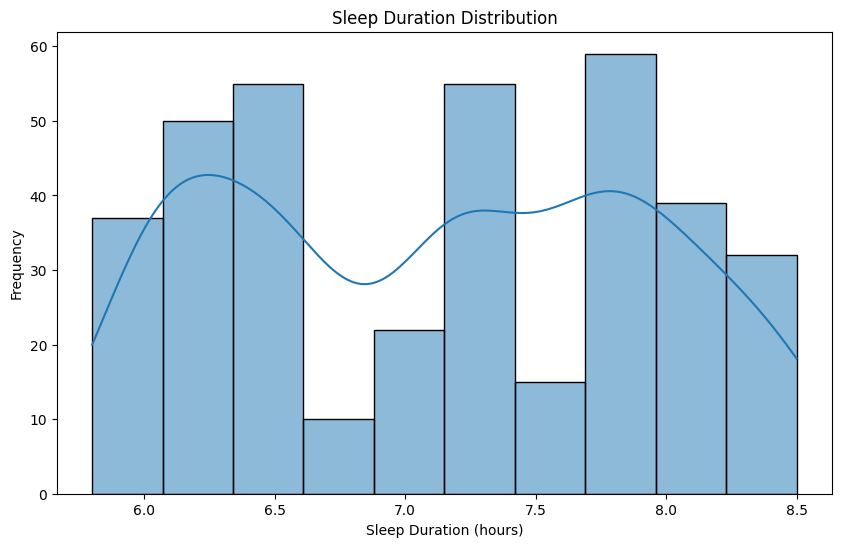

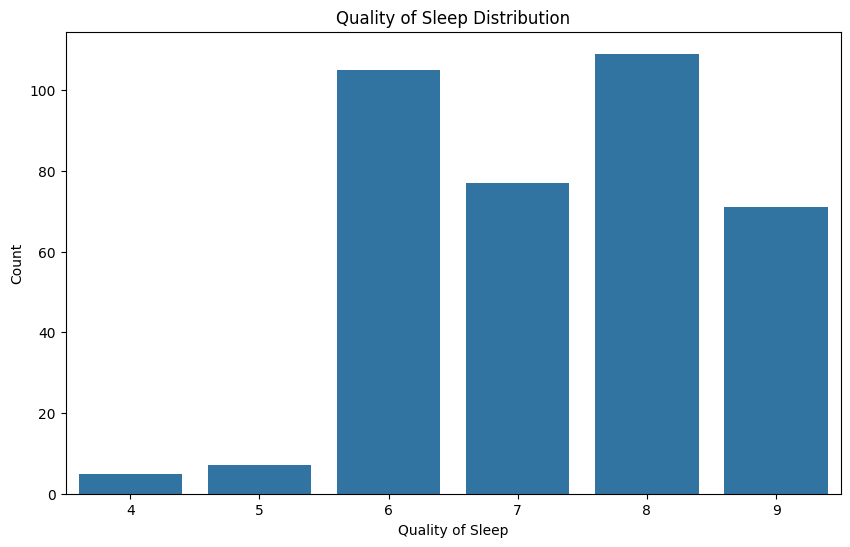

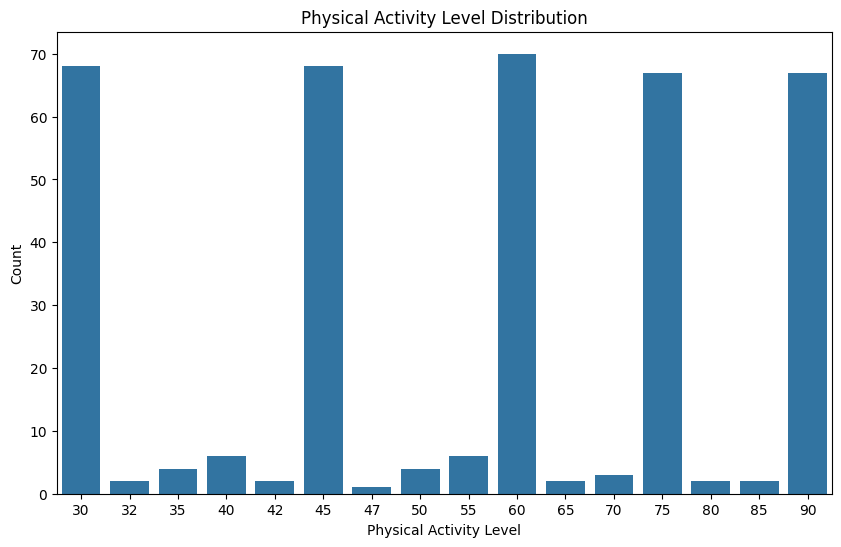

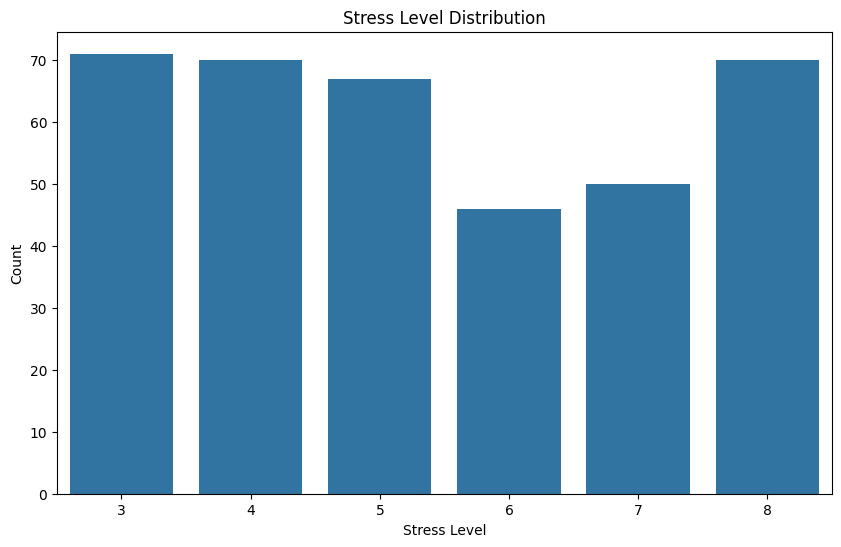

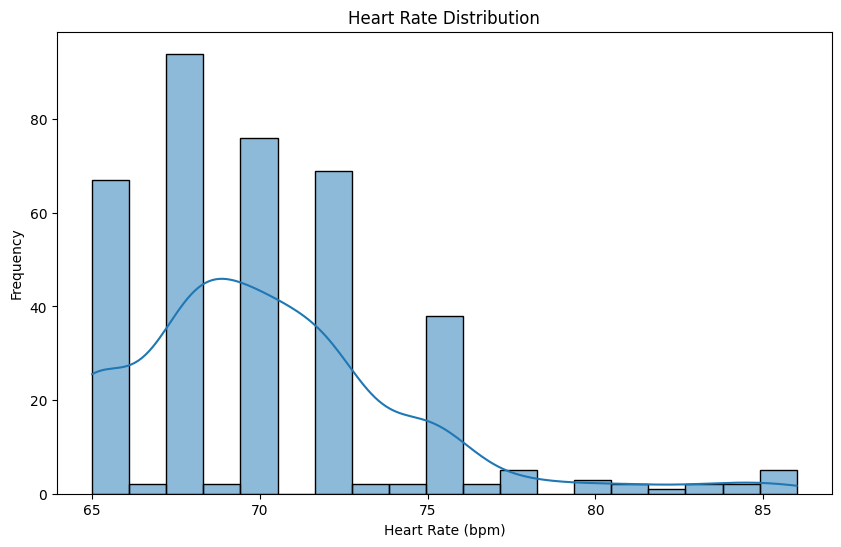

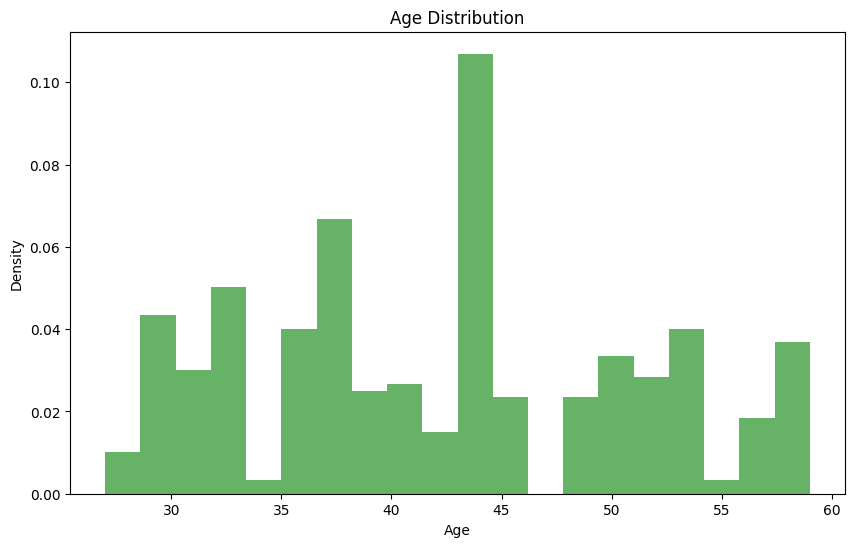

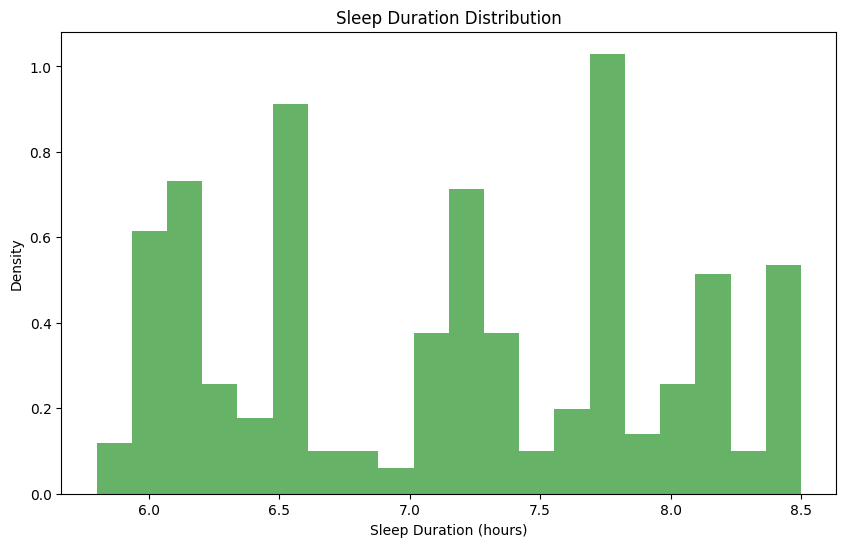

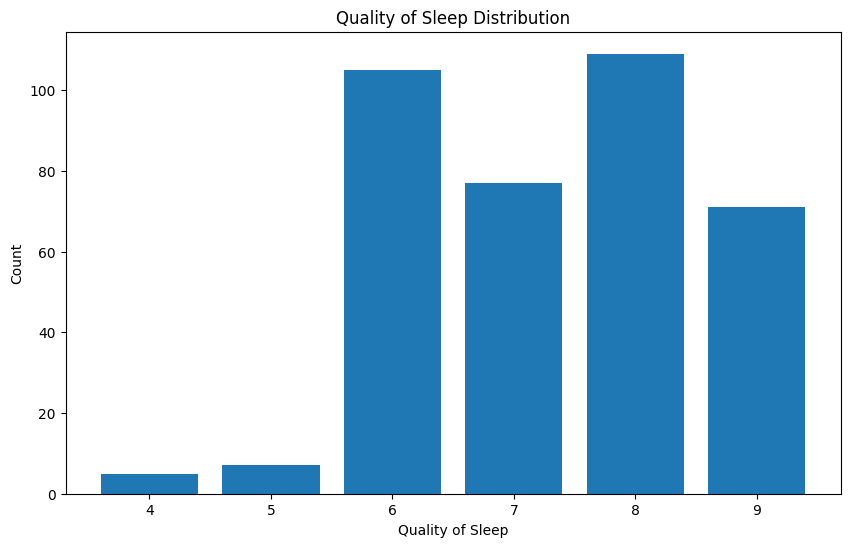

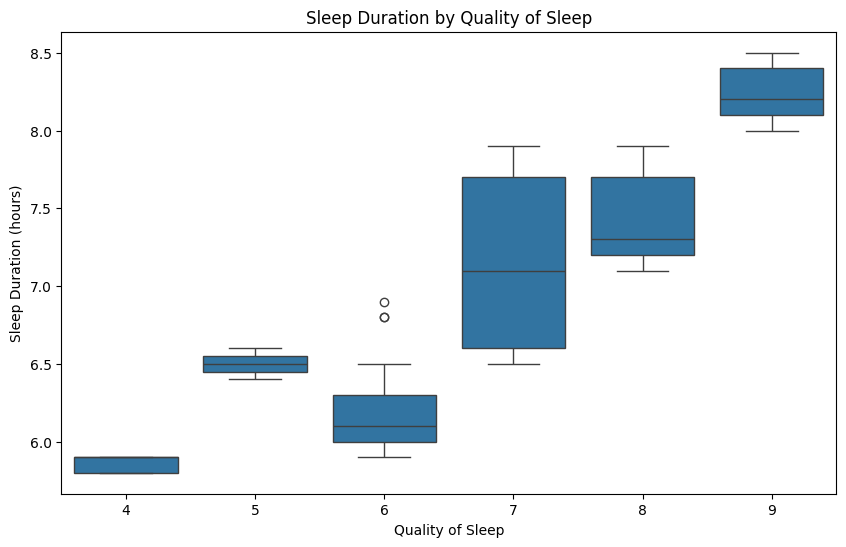

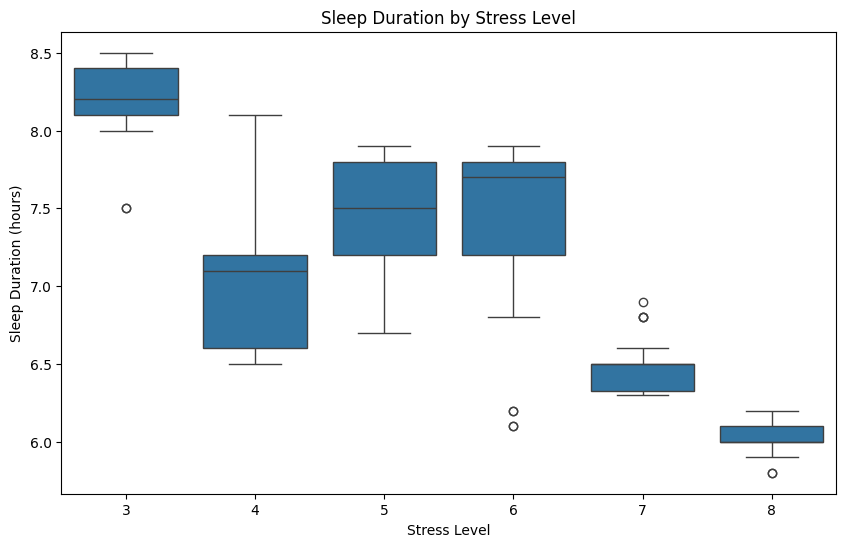

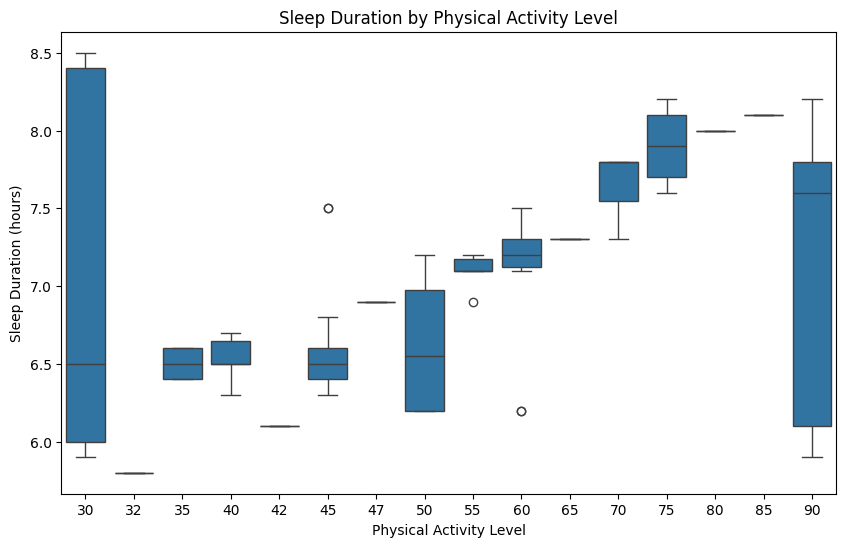

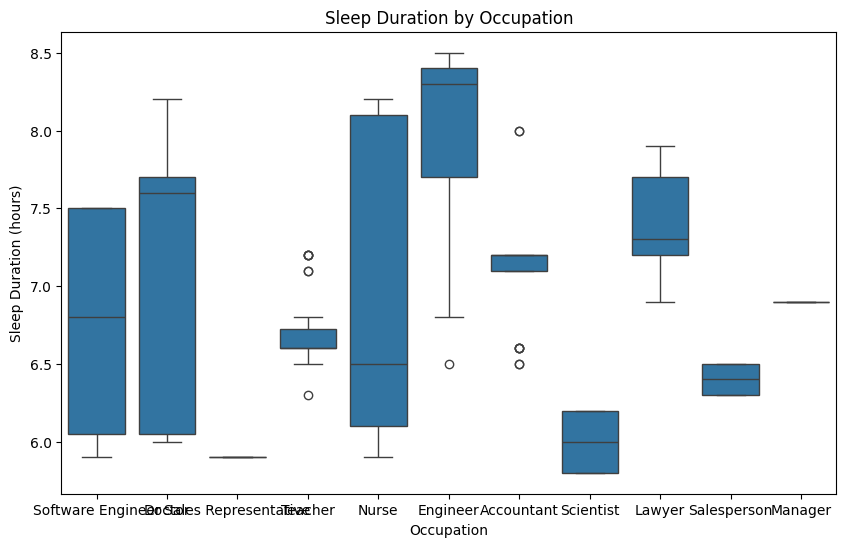

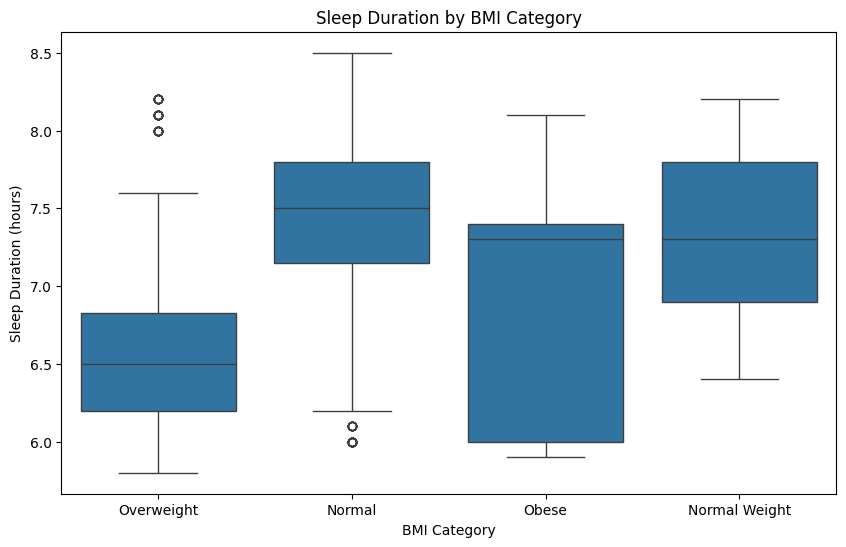

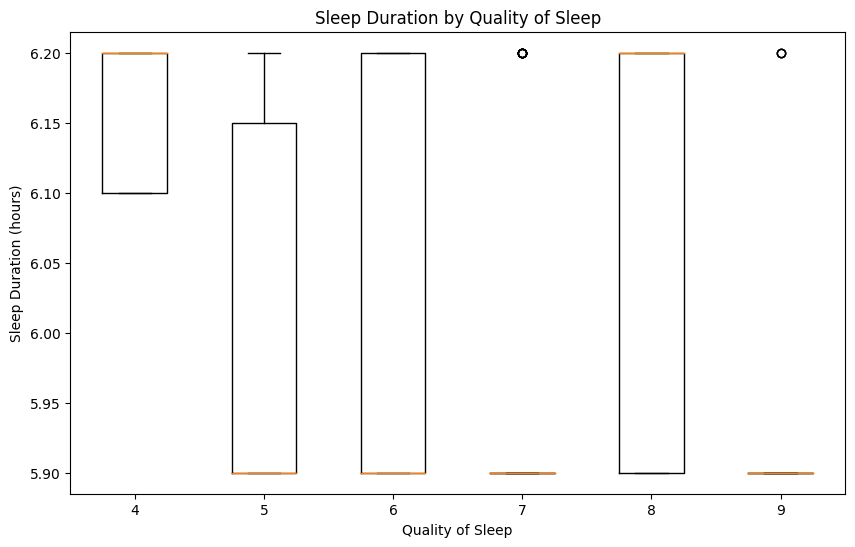

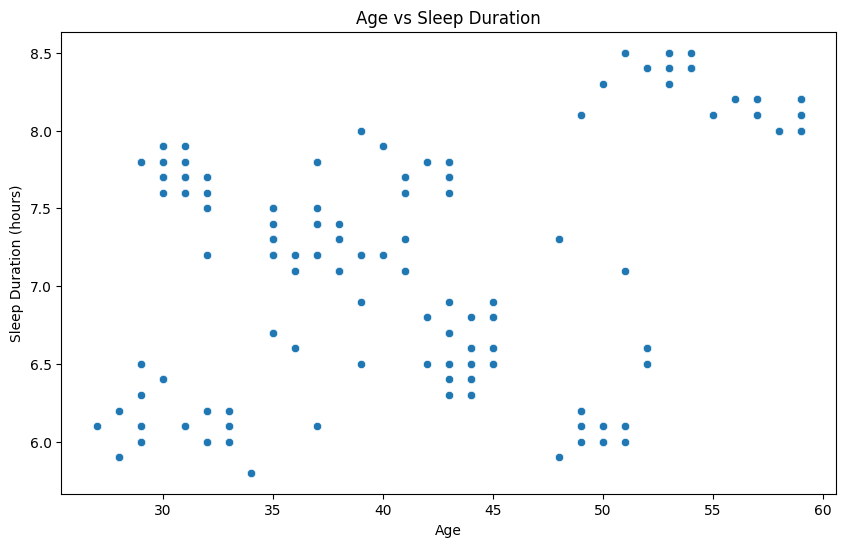

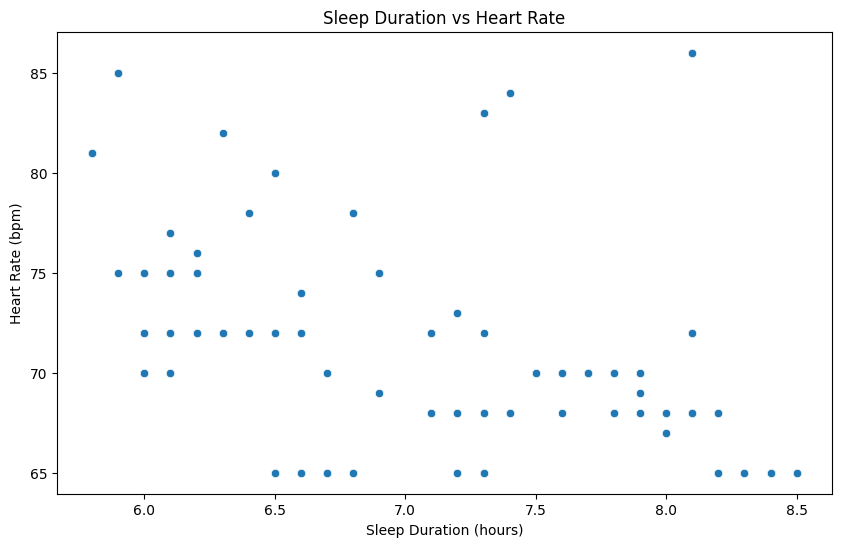

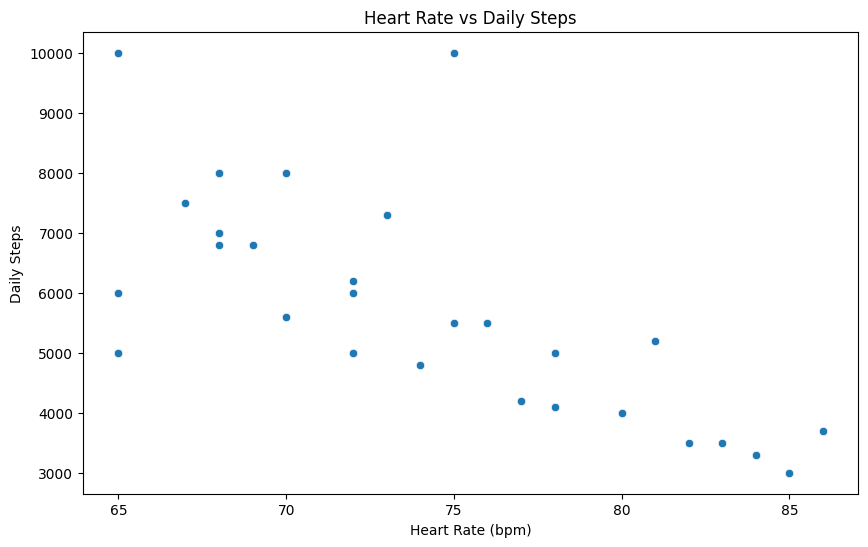

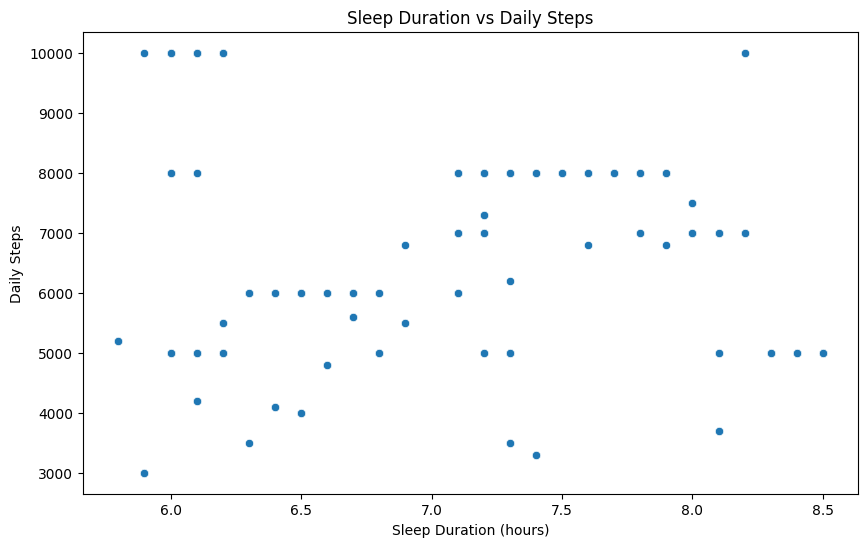

Time taken by pandas: 1.1377930641174316 seconds
Time taken by NumPy for distributions: 0.48291897773742676 seconds
Time taken by NumPy for boxplots: 0.33774542808532715 seconds
Time difference between pandas and NumPy (distributions): 0.6548740863800049 seconds
Time difference between pandas and NumPy (boxplots): 0.8000476360321045 seconds


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time


df = pd.read_csv('sleep_health.csv')

# Write your code for AIM #3 here

# Step 1: Using pandas and matplotlib/seaborn to plot distributions
start_time_pandas = time.time()

# 1.1 Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 1.2 Sleep Duration distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Sleep Duration'], kde=True)
plt.title('Sleep Duration Distribution')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

# 1.3 Quality of Sleep distribution (assuming ordinal scale)
plt.figure(figsize=(10, 6))
sns.countplot(x='Quality of Sleep', data=df)
plt.title('Quality of Sleep Distribution')
plt.xlabel('Quality of Sleep')
plt.ylabel('Count')
plt.show()

# 1.4 Physical Activity Level distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Physical Activity Level', data=df)
plt.title('Physical Activity Level Distribution')
plt.xlabel('Physical Activity Level')
plt.ylabel('Count')
plt.show()

# 1.5 Stress Level distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Stress Level', data=df)
plt.title('Stress Level Distribution')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.show()

# 1.6 Heart Rate distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Heart Rate'], kde=True)
plt.title('Heart Rate Distribution')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.show()

end_time_pandas = time.time()
time_diff_pandas = end_time_pandas - start_time_pandas

# Step 2: 
start_time_numpy = time.time()

# To count unique values and their total count in a NumPy array, use 
# np.unique(array_name, return_counts=True)--- This will return two values, one is the unique values and the other is the total count of each unique value
# You will need this for plotting bar plots

# 2.1 Age distribution using NumPy
age = df['Age'].values
plt.figure(figsize=(10, 6))
plt.hist(age, bins=20, density=True, alpha=0.6, color='g')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

# 2.2 Sleep Duration distribution using NumPy
sleep_duration = df['Sleep Duration'].values
plt.figure(figsize=(10, 6))
plt.hist(sleep_duration, bins=20, density=True, alpha=0.6, color='g')
plt.title('Sleep Duration Distribution')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Density')
plt.show()


unique, counts = np.unique(df['Quality of Sleep'].values, return_counts=True)
plt.figure(figsize=(10, 6))
plt.bar(unique, counts)
plt.title('Quality of Sleep Distribution')
plt.xlabel('Quality of Sleep')
plt.ylabel('Count')
plt.show()

end_time_numpy = time.time()
time_diff_numpy = end_time_numpy - start_time_numpy

# Step 3
# 3.1 Sleep Duration based on Quality of Sleep
plt.figure(figsize=(10, 6))
sns.boxplot(x='Quality of Sleep', y='Sleep Duration', data=df)
plt.title('Sleep Duration by Quality of Sleep')
plt.xlabel('Quality of Sleep')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 3.2 Sleep Duration based on Stress Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stress Level', y='Sleep Duration', data=df)
plt.title('Sleep Duration by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 3.3 Sleep Duration based on Physical Activity Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='Physical Activity Level', y='Sleep Duration', data=df)
plt.title('Sleep Duration by Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 3.4 
plt.figure(figsize=(10, 6))
sns.boxplot(x='Occupation', y='Sleep Duration', data=df)
plt.title('Sleep Duration by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 3.5 
plt.figure(figsize=(10, 6))
sns.boxplot(x='BMI Category', y='Sleep Duration', data=df)
plt.title('Sleep Duration by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# Step 4: Using only NumPy, do the same as Step 3. You will need matplotlib for this
# For box plots in NumPy you will need to 
# create a list of variable1, grouped by the unique value of some variable2 (nominal or ordinal), 
# Syntax: variable1_list = [variable1[variable2 == i] for i in np.unique(variable2)]

start_time_numpy_boxplots = time.time()

# 4.1 Sleep Duration based on Quality of Sleep using NumPy
quality_of_sleep = df['Quality of Sleep'].values
sleep_duration = df['Sleep Duration'].values

# Group sleep duration by quality of sleep
unique, unique_indices = np.unique(quality_of_sleep, return_inverse=True)
sleep_duration_by_quality = np.split(sleep_duration[unique_indices], np.cumsum(np.bincount(unique_indices))[:-1])

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(sleep_duration_by_quality, labels=unique)
plt.title('Sleep Duration by Quality of Sleep')
plt.xlabel('Quality of Sleep')
plt.ylabel('Sleep Duration (hours)')
plt.show()

end_time_numpy_boxplots = time.time()
time_diff_numpy_boxplots = end_time_numpy_boxplots - start_time_numpy_boxplots

# Step 5
# 5.1 Age and Sleep Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Sleep Duration', data=df)
plt.title('Age vs Sleep Duration')
plt.xlabel('Age')
plt.ylabel('Sleep Duration (hours)')
plt.show()

# 5.2 Sleep Duration and Heart Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sleep Duration', y='Heart Rate', data=df)
plt.title('Sleep Duration vs Heart Rate')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Heart Rate (bpm)')
plt.show()

# 5.3 Heart Rate and Daily Steps
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Heart Rate', y='Daily Steps', data=df)
plt.title('Heart Rate vs Daily Steps')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Daily Steps')
plt.show()

# 5.4 Sleep Duration and Daily Steps
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sleep Duration', y='Daily Steps', data=df)
plt.title('Sleep Duration vs Daily Steps')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Daily Steps')
plt.show()

# Calculate the time difference
print(f"Time taken by pandas: {time_diff_pandas} seconds")
print(f"Time taken by NumPy for distributions: {time_diff_numpy} seconds")
print(f"Time taken by NumPy for boxplots: {time_diff_numpy_boxplots} seconds")
print(f"Time difference between pandas and NumPy (distributions): {abs(time_diff_pandas - time_diff_numpy)} seconds")
print(f"Time difference between pandas and NumPy (boxplots): {abs(time_diff_pandas - time_diff_numpy_boxplots)} seconds")


AIM #4: Other possible plotting

1. Think of other possible plots to show some interesting distribution and relations. Do this using both pandas and NumPy

